# Jayden Uphill

## Research question/interests

My interest in this topic focuses on which countries are mitigating their carbon footprint. I want to know:

1. Which countries (if any) have reduced their annual C02 emissions within the last 15 years? (2004-2019)

2. Does the wealth of a country have a corrolation to higher C02 emissions? E.g. U.S.A. is more wealthy than China but may emit less C02, and more wealthy than Canada but may emit more C02.


In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(font_scale=0.9, palette = "rocket")


In [161]:
carbonData = pd.read_csv('../data/raw/CO2emissions.csv', skiprows =4)
carbon = carbonData.drop(carbonData.columns[[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,64,65,66]], axis=1)

print(carbon)

                    Country Name Country Code  \
0                          Aruba          ABW   
1    Africa Eastern and Southern          AFE   
2                    Afghanistan          AFG   
3     Africa Western and Central          AFW   
4                         Angola          AGO   
..                           ...          ...   
261                       Kosovo          XKX   
262                  Yemen, Rep.          YEM   
263                 South Africa          ZAF   
264                       Zambia          ZMB   
265                     Zimbabwe          ZWE   

                             Indicator Name      1991      1992      1993  \
0    CO2 emissions (metric tons per capita)       NaN       NaN       NaN   
1    CO2 emissions (metric tons per capita)  0.953224  0.915661  0.916485   
2    CO2 emissions (metric tons per capita)  0.167682  0.095958  0.084721   
3    CO2 emissions (metric tons per capita)  0.530016  0.568305  0.523529   
4    CO2 emissions (metric

In [162]:
GDP = pd.read_csv('../data/raw/gdp-per-capita-worldbank.csv')

print(GDP)

           Entity Code  Year  \
0     Afghanistan  AFG  2002   
1     Afghanistan  AFG  2003   
2     Afghanistan  AFG  2004   
3     Afghanistan  AFG  2005   
4     Afghanistan  AFG  2006   
...           ...  ...   ...   
6161     Zimbabwe  ZWE  2016   
6162     Zimbabwe  ZWE  2017   
6163     Zimbabwe  ZWE  2018   
6164     Zimbabwe  ZWE  2019   
6165     Zimbabwe  ZWE  2020   

      GDP per capita, PPP (constant 2017 international $)  
0                                           1189.784668    
1                                           1235.810059    
2                                           1200.277954    
3                                           1286.793701    
4                                           1315.789062    
...                                                 ...    
6161                                        3678.217041    
6162                                        3795.642334    
6163                                        3923.030518    
6164           

## Milestone 3

In [202]:
Pcarbon = carbon.drop(carbon.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14,15]], axis=1)
#Shows the data for each country for the last 15 years (each country has an equal amount of recorded data)
Pcarbon.count()

Country Name    266
Country Code    266
2004            239
2005            239
2006            239
2007            239
2008            239
2009            239
2010            239
2011            239
2012            239
2013            239
2014            239
2015            239
2016            239
2017            239
2018            239
2019            239
dtype: int64

In [164]:
Pcarbon.head()

,Country Name,Country Code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1.036161,1.011151,0.999696,1.016758,1.057285,0.994719,1.021548,0.979352,0.992616,1.005027,1.016649,0.966589,0.948410,0.937926,0.917507,0.913618
2,Afghanistan,AFG,0.041655,0.060419,0.066583,0.065312,0.128417,0.171862,0.243614,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824
3,Africa Western and Central,AFW,0.507780,0.508247,0.474162,0.441870,0.456156,0.430200,0.472077,0.476789,0.480603,0.508099,0.515960,0.494065,0.499405,0.483140,0.486456,0.493923
4,Angola,AGO,0.930263,0.813539,0.821840,0.811754,0.888658,0.939404,0.976184,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137


In [232]:
#deleting NaN values
Pcarbon = Pcarbon.dropna().reset_index(drop=True)
Pcarbon.count()

Country Name    239
Country Code    239
2004            239
2005            239
2006            239
2007            239
2008            239
2009            239
2010            239
2011            239
2012            239
2013            239
2014            239
2015            239
2016            239
2017            239
2018            239
2019            239
dtype: int64

This method shows global (each country combined) statistics per year

In [168]:
Pcarbon.describe()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,4.372777,4.404123,4.471841,4.461531,4.436029,4.495982,4.333087,4.337205,4.375662,4.286836,4.198346,4.152282,4.155511,4.161985,4.138992,4.089567
std,5.701152,5.593012,5.583832,5.439832,5.310002,5.180194,5.016823,4.971602,4.953363,4.889850,4.774560,4.686689,4.640333,4.578774,4.480231,4.439935
min,0.021033,0.020367,0.023660,0.022894,0.022151,0.021435,0.034580,0.040186,0.040017,0.026979,0.029121,0.039370,0.030715,0.035013,0.037113,0.036986
25%,0.726152,0.758618,0.730561,0.716295,0.661667,0.698265,0.721447,0.774549,0.784804,0.750497,0.802000,0.799460,0.784215,0.803291,0.819434,0.819559
50%,2.413985,2.510290,2.656578,2.662027,2.749936,2.771868,2.682569,2.699957,2.869867,2.672439,2.758047,2.731323,2.756557,2.696077,2.913849,2.954129
75%,6.377792,6.478570,6.468566,6.407316,6.420304,6.592198,6.084064,6.226125,6.330283,6.217697,6.007777,5.902288,5.839915,6.077849,6.024132,5.961174
max,49.208051,44.533806,42.798308,40.896524,36.918708,32.671800,32.634302,33.494413,34.188222,32.598940,33.205895,33.043510,32.745888,32.127990,31.067533,32.474469


2019 has a lower average emmision rate than any other year (2004-2019).
2006 has a higher average emmision rate.

Below is that data visualized

<AxesSubplot:>

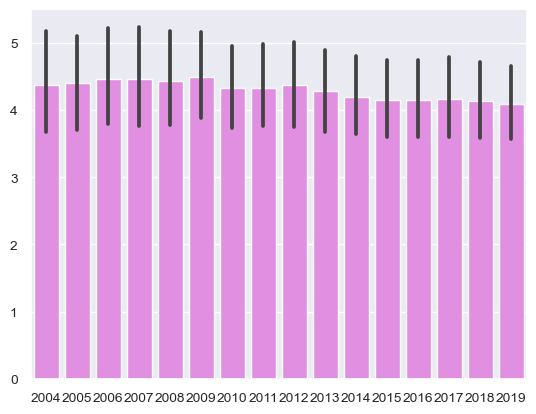

In [169]:
sns.barplot(data=Pcarbon, color = 'violet')

Additionally, we can see Global GDP per year

In [170]:
PGDP = GDP[GDP.Year >= 2004]
PGDP = PGDP[PGDP.Year <= 2019]
PGDP.rename(columns={"GDP per capita, PPP (constant 2017 international $)" : "GDP"}, inplace=True)
PGDP.describe()

,Year,GDP
count,3305.000000,3305.000000
mean,2011.541906,20128.960472
std,4.602230,21578.333244
min,2004.000000,751.664124
25%,2008.000000,4417.150391
50%,2012.000000,12221.440430
75%,2016.000000,29053.333984
max,2019.000000,161971.468750


<AxesSubplot:xlabel='Year', ylabel='GDP'>

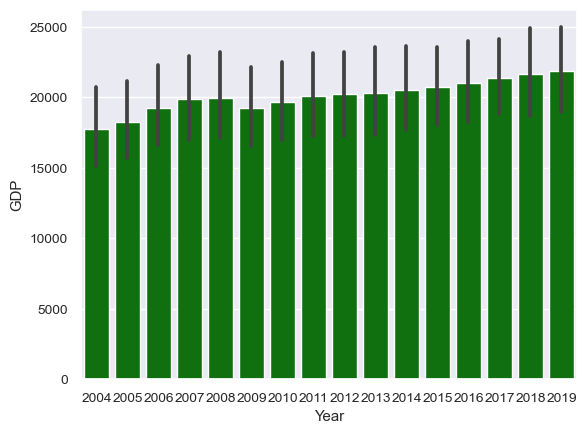

In [171]:
sns.barplot(PGDP, x="Year", y="GDP", color='green')

With this information, we can see that as GDP is increasing on average, carbon emissions are lowering throughout the years. More research is needed to determine if this is a direct correlation 

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Relative Data')]

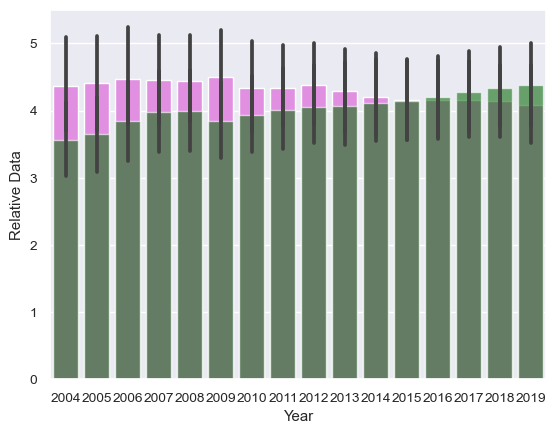

In [172]:
#Code taken from:
#https://www.geeksforgeeks.org/how-to-overlap-two-barplots-in-seaborn/

ax = plt.subplots()

ax = sns.barplot(data=Pcarbon, color='violet')
ax = sns.barplot(data=PGDP, x=PGDP["Year"], y=PGDP["GDP"]/5000, color='green', alpha=0.6)

ax.set(xlabel="Year", ylabel="Relative Data")

In [241]:
# this may not be necessary 
Years = Pcarbon.drop(Pcarbon.columns[[0,1]], axis=1)
NameIndex = Pcarbon[['Country Name', 'Country Code']]

In [242]:
values = []
i = 0
while i < len(Pcarbon['2004']):
    values.append(Pcarbon['2004'][i] - Pcarbon['2019'][i])
    i+=1
sorted = values.copy()
sorted.sort(reverse=True)

#this gives us the index of the countries who improved their carbon footprint the most from 2004-2019
top10 = sorted[0:11]
cIndex = []
for x in top10:
    cIndex.append(values.index(x))
j = 0
print("Most improved countries (ordered):")
while j < len(cIndex):
    print(f" -{NameIndex['Country Name'][cIndex[j]]}")
    j+=1  

Most improved countries (ordered):
 -Qatar
 -Luxembourg
 -United Arab Emirates
 -Kuwait
 -Finland
 -United States
 -Denmark
 -Estonia
 -Equatorial Guinea
 -North America
 -United Kingdom


<AxesSubplot:>

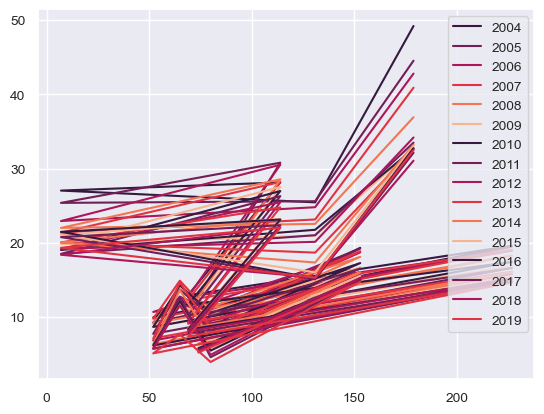

In [256]:
Top = Pcarbon.loc[cIndex]
Top = Top.drop(Top.columns[[0]], axis=1)
Top.pivot(index='Country Code', columns=['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])
#Top.head()
Top.plot()

### Method Chaining

ModuleNotFoundError: No module named 'project_functions1'